In [ ]:
pip install pycaret

In [3]:
import pandas as pd
from pycaret.classification import *
from time import time

from pycaret.datasets import get_data
data = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data['Class variable'].value_counts()

0    500
1    268
Name: Class variable, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=2022)
train.shape, test.shape

((614, 9), (154, 9))

In [36]:
cell_start_time = time()
clf = setup(data = train, target='Class variable', silent=True, fix_imbalance =True)
cell_end_time = time()
print("CELL RUN TIME : ",cell_end_time - cell_start_time)

,Description,Value
0,session_id,3386
1,Target,Class variable
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(614, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Class variable',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numer...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', '

CELL RUN TIME :  2.3536171913146973


In [37]:
cell_start_time = time()
top5_models = compare_models(fold = 5, round = 3, sort = 'f1', n_select = 5)
cell_end_time = time()
print("CELL RUN TIME : ",cell_end_time - cell_start_time)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.762,0.823,0.720,0.661,0.687,0.496,0.500,0.148
lightgbm,Light Gradient Boosting Machine,0.760,0.819,0.707,0.660,0.683,0.490,0.491,0.074
rf,Random Forest Classifier,0.757,0.817,0.675,0.666,0.669,0.478,0.480,0.614
ada,Ada Boost Classifier,0.727,0.770,0.669,0.616,0.640,0.421,0.424,0.146
ridge,Ridge Classifier,0.727,0.000,0.662,0.618,0.639,0.420,0.422,0.036
lda,Linear Discriminant Analysis,0.723,0.779,0.650,0.613,0.630,0.409,0.410,0.036
lr,Logistic Regression,0.718,0.784,0.656,0.604,0.628,0.402,0.404,0.302
knn,K Neighbors Classifier,0.676,0.741,0.707,0.545,0.614,0.343,0.353,0.160
et,Extra Trees Classifier,0.730,0.788,0.581,0.643,0.607,0.403,0.407,0.554
dt,Decision Tree Classifier,0.660,0.631,0.528,0.535,0.528,0.262,0.265,0.038


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3386, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20

CELL RUN TIME :  20.37555980682373


In [38]:
best = compare_models(fold = 5, round = 3, sort = 'f1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.762,0.823,0.720,0.661,0.687,0.496,0.500,0.456
lightgbm,Light Gradient Boosting Machine,0.760,0.819,0.707,0.660,0.683,0.490,0.491,0.086
rf,Random Forest Classifier,0.757,0.817,0.675,0.666,0.669,0.478,0.480,0.700
ada,Ada Boost Classifier,0.727,0.770,0.669,0.616,0.640,0.421,0.424,0.348
ridge,Ridge Classifier,0.727,0.000,0.662,0.618,0.639,0.420,0.422,0.040
lda,Linear Discriminant Analysis,0.723,0.779,0.650,0.613,0.630,0.409,0.410,0.050
lr,Logistic Regression,0.718,0.784,0.656,0.604,0.628,0.402,0.404,0.494
knn,K Neighbors Classifier,0.676,0.741,0.707,0.545,0.614,0.343,0.353,0.188
et,Extra Trees Classifier,0.730,0.788,0.581,0.643,0.607,0.403,0.407,0.642
dt,Decision Tree Classifier,0.660,0.631,0.528,0.535,0.528,0.262,0.265,0.034


INFO:logs:create_model_container: 28
INFO:logs:master_model_container: 28
INFO:logs:display_container: 3
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3386, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [39]:
evaluate_model(best)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3386, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [40]:
top5_models

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=3386, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=3

In [49]:
total_models = []
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [50]:
cell_start_time = time()
model_gbc = create_model('gbc', fold = 5)
total_models.append(model_gbc)
cell_end_time = time()
print("CELL RUN TIME : ",cell_end_time - cell_start_time)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7674,0.8218,0.8438,0.6429,0.7297,0.5321,0.5473
1,0.7442,0.7622,0.6250,0.6667,0.6452,0.4455,0.4461
2,0.7442,0.8416,0.6774,0.6364,0.6562,0.4529,0.4534
3,0.8256,0.8821,0.8065,0.7353,0.7692,0.6295,0.6313
4,0.7294,0.8070,0.6452,0.6250,0.6349,0.4201,0.4202
Mean,0.7622,0.8229,0.7196,0.6612,0.6871,0.4960,0.4996
Std,0.0340,0.0395,0.0886,0.0395,0.0529,0.0766,0.0786


INFO:logs:create_model_container: 34
INFO:logs:master_model_container: 34
INFO:logs:display_container: 9
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3386, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


CELL RUN TIME :  11.474284648895264


In [52]:
cell_start_time = time()
model_lightgbm = create_model('lightgbm', fold = 5)
total_models.append(model_lightgbm)
cell_end_time = time()
print("CELL RUN TIME : ",cell_end_time - cell_start_time)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7326,0.8374,0.6562,0.6364,0.6462,0.4313,0.4314
1,0.7674,0.7807,0.7188,0.6765,0.6970,0.5086,0.5092
2,0.7442,0.8323,0.6774,0.6364,0.6562,0.4529,0.4534
3,0.8140,0.8581,0.8065,0.7143,0.7576,0.6075,0.6105
4,0.7412,0.7861,0.6774,0.6364,0.6562,0.4490,0.4496
Mean,0.7599,0.8189,0.7073,0.6600,0.6826,0.4899,0.4908
Std,0.0294,0.0303,0.0536,0.0313,0.0413,0.0643,0.0652


INFO:logs:create_model_container: 35
INFO:logs:master_model_container: 35
INFO:logs:display_container: 10
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3386, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


CELL RUN TIME :  2.6268749237060547


In [44]:
cell_start_time = time()
model_rf = create_model('rf', fold = 5)
total_models.append(model_rf)
cell_end_time = time()
print("CELL RUN TIME : ",cell_end_time - cell_start_time)
model_rf

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7907,0.8513,0.7812,0.6944,0.7353,0.5632,0.5659
1,0.7093,0.7865,0.5312,0.6296,0.5763,0.3574,0.3604
2,0.7791,0.8252,0.6452,0.7143,0.6780,0.5105,0.5120
3,0.8023,0.8466,0.7742,0.7059,0.7385,0.5801,0.5817
4,0.7059,0.7739,0.6452,0.5882,0.6154,0.3781,0.3792
Mean,0.7575,0.8167,0.6754,0.6665,0.6687,0.4779,0.4798
Std,0.0414,0.0313,0.0934,0.0492,0.0645,0.0930,0.0930


INFO:logs:create_model_container: 31
INFO:logs:master_model_container: 31
INFO:logs:display_container: 6
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=3386, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


CELL RUN TIME :  4.218474864959717


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=3386, verbose=0,
                       warm_start=False)

In [53]:
cell_start_time = time()
model_ada = create_model('ada', fold = 5)
total_models.append(model_ada)
cell_end_time = time()
print("CELL RUN TIME : ",cell_end_time - cell_start_time)
model_ada

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7442,0.7963,0.7500,0.6316,0.6857,0.4727,0.4777
1,0.6744,0.6918,0.5000,0.5714,0.5333,0.2850,0.2865
2,0.7209,0.7718,0.7097,0.5946,0.6471,0.4192,0.4237
3,0.7674,0.7877,0.7419,0.6571,0.6970,0.5094,0.5119
4,0.7294,0.8011,0.6452,0.6250,0.6349,0.4201,0.4202
Mean,0.7273,0.7697,0.6694,0.6159,0.6396,0.4213,0.4240
Std,0.0308,0.0402,0.0924,0.0299,0.0579,0.0761,0.0768


INFO:logs:create_model_container: 36
INFO:logs:master_model_container: 36
INFO:logs:display_container: 11
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=3386)
INFO:logs:create_model() succesfully completed......................................


CELL RUN TIME :  2.1326398849487305


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=3386)

In [54]:
cell_start_time = time()
model_ridge = create_model('ridge', fold = 5)
total_models.append(model_ridge)
cell_end_time = time()
print("CELL RUN TIME : ",cell_end_time - cell_start_time)
model_ridge

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7326,0.0,0.6875,0.6286,0.6567,0.4384,0.4396
1,0.7326,0.0,0.6250,0.6452,0.6349,0.4240,0.4241
2,0.6744,0.0,0.5806,0.5455,0.5625,0.3036,0.3040
3,0.7791,0.0,0.7742,0.6667,0.7164,0.5371,0.5411
4,0.7176,0.0,0.6452,0.6061,0.6250,0.3989,0.3994
Mean,0.7273,0.0,0.6625,0.6184,0.6391,0.4204,0.4217
Std,0.0335,0.0,0.0656,0.0415,0.0497,0.0749,0.0761


INFO:logs:create_model_container: 37
INFO:logs:master_model_container: 37
INFO:logs:display_container: 12
INFO:logs:RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=3386,
                solver='auto', tol=0.001)
INFO:logs:create_model() succesfully completed......................................


CELL RUN TIME :  2.0384719371795654


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=3386,
                solver='auto', tol=0.001)

In [55]:
total_models

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=3386, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=3

In [56]:
model_gbc = tune_model(model_gbc, fold=5, optimize = 'AUC', choose_better = True)
model_lightgbm = tune_model(model_lightgbm, fold=5, optimize = 'AUC', choose_better = True)
model_rf = tune_model(model_rf, fold=5, optimize = 'AUC', choose_better = True)
model_ada = tune_model(model_ada, fold=5, optimize = 'AUC', choose_better = True)
model_ridge = tune_model(model_ridge, fold=5, optimize = 'AUC', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6744,0.0,0.6250,0.5556,0.5882,0.3205,0.3221
1,0.6279,0.0,0.5000,0.5000,0.5000,0.2037,0.2037
2,0.6279,0.0,0.6774,0.4884,0.5676,0.2558,0.2664
3,0.7326,0.0,0.7742,0.6000,0.6761,0.4545,0.4652
4,0.6118,0.0,0.6774,0.4773,0.5600,0.2309,0.2423
Mean,0.6549,0.0,0.6508,0.5242,0.5784,0.2931,0.2999
Std,0.0441,0.0,0.0895,0.0465,0.0570,0.0895,0.0911


INFO:logs:create_model_container: 47
INFO:logs:master_model_container: 47
INFO:logs:display_container: 17
INFO:logs:RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=3386,
                solver='auto', tol=0.001)
INFO:logs:tune_model() succesfully completed......................................


In [57]:
tuned_models  = [model_gbc, model_lightgbm, model_rf, model_ada, model_ridge]

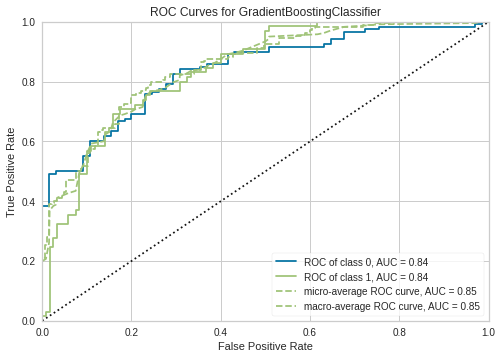

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [58]:
plot_model(model_gbc, plot='auc')

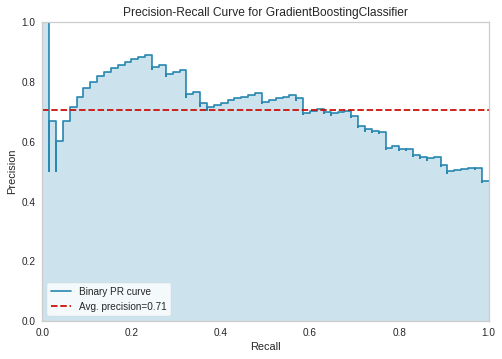

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [59]:
plot_model(model_gbc, plot='pr')

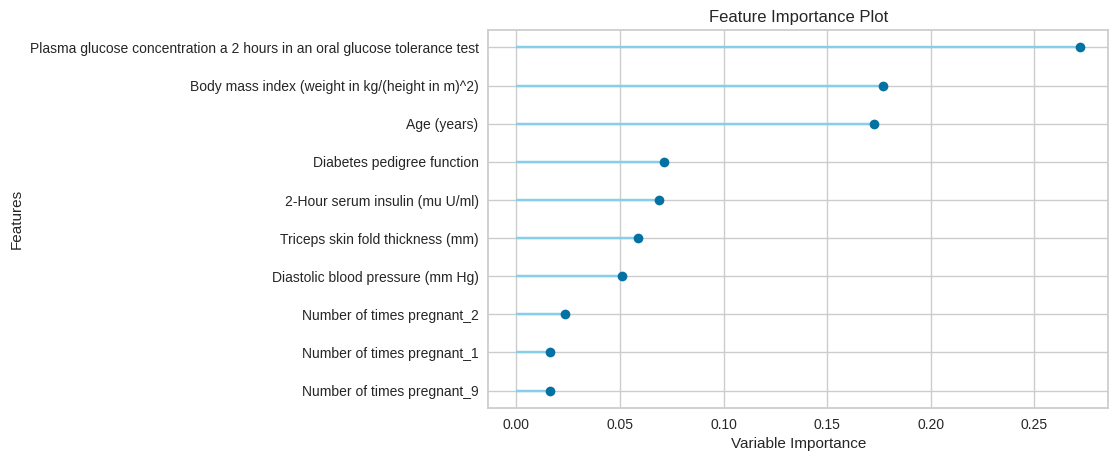

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [60]:
plot_model(model_gbc, plot='feature')

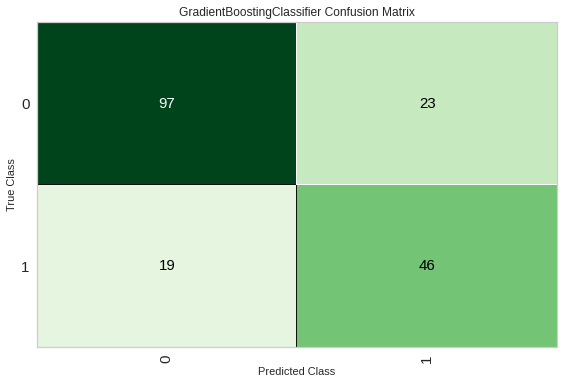

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [61]:
plot_model(model_gbc, plot = 'confusion_matrix')

In [62]:
for model in tuned_models:
    display(predict_model(model))

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.0001, loss='deviance', max_depth=10,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.01, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3386, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.773,0.8401,0.7077,0.6667,0.6866,0.5088,0.5094


,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Number of times pregnant_0,Number of times pregnant_1,Number of times pregnant_10,...,Number of times pregnant_3,Number of times pregnant_4,Number of times pregnant_5,Number of times pregnant_6,Number of times pregnant_7,Number of times pregnant_8,Number of times pregnant_9,Class variable,Label,Score
0,150.0,66.0,42.0,342.0,34.700001,0.718,42.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0.5052
1,91.0,62.0,0.0,0.0,27.299999,0.525,22.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5063
2,136.0,82.0,0.0,0.0,0.000000,0.640,69.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.5045
3,115.0,64.0,22.0,0.0,30.799999,0.421,21.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5056
4,97.0,76.0,27.0,0.0,35.599998,0.378,52.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0.5037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,57.0,80.0,37.0,0.0,32.799999,0.096,41.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.5015
181,104.0,64.0,37.0,64.0,33.599998,0.510,22.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.5027
182,121.0,78.0,17.0,0.0,26.500000,0.259,62.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5021
183,158.0,114.0,0.0,0.0,42.299999,0.257,44.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.5030


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=1.0, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.15, max_depth=-1,
               min_child_samples=16, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=300, n_jobs=-1, num_leaves=90, objective=None,
               random_state=3386, reg_alpha=4, reg_lambda=3, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7946,0.8485,0.7692,0.6849,0.7246,0.5617,0.5641


,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Number of times pregnant_0,Number of times pregnant_1,Number of times pregnant_10,...,Number of times pregnant_3,Number of times pregnant_4,Number of times pregnant_5,Number of times pregnant_6,Number of times pregnant_7,Number of times pregnant_8,Number of times pregnant_9,Class variable,Label,Score
0,150.0,66.0,42.0,342.0,34.700001,0.718,42.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0.8143
1,91.0,62.0,0.0,0.0,27.299999,0.525,22.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9084
2,136.0,82.0,0.0,0.0,0.000000,0.640,69.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.8127
3,115.0,64.0,22.0,0.0,30.799999,0.421,21.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8124
4,97.0,76.0,27.0,0.0,35.599998,0.378,52.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0.6357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,57.0,80.0,37.0,0.0,32.799999,0.096,41.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.6820
181,104.0,64.0,37.0,64.0,33.599998,0.510,22.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.6619
182,121.0,78.0,17.0,0.0,26.500000,0.259,62.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.6133
183,158.0,114.0,0.0,0.0,42.299999,0.257,44.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.7180


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=4, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.02, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=160,
                       n_jobs=-1, oob_score=False, random_state=3386, verbose=0,
                       warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7676,0.8422,0.7692,0.641,0.6993,0.5124,0.5181


,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Number of times pregnant_0,Number of times pregnant_1,Number of times pregnant_10,...,Number of times pregnant_3,Number of times pregnant_4,Number of times pregnant_5,Number of times pregnant_6,Number of times pregnant_7,Number of times pregnant_8,Number of times pregnant_9,Class variable,Label,Score
0,150.0,66.0,42.0,342.0,34.700001,0.718,42.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0.6887
1,91.0,62.0,0.0,0.0,27.299999,0.525,22.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7593
2,136.0,82.0,0.0,0.0,0.000000,0.640,69.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.6180
3,115.0,64.0,22.0,0.0,30.799999,0.421,21.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.6913
4,97.0,76.0,27.0,0.0,35.599998,0.378,52.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0.5608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,57.0,80.0,37.0,0.0,32.799999,0.096,41.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.5270
181,104.0,64.0,37.0,64.0,33.599998,0.510,22.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.6328
182,121.0,78.0,17.0,0.0,26.500000,0.259,62.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5613
183,158.0,114.0,0.0,0.0,42.299999,0.257,44.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.6174


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.1,
                   n_estimators=130, random_state=3386), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.7297,0.8292,0.7538,0.5904,0.6622,0.4424,0.4516


,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Number of times pregnant_0,Number of times pregnant_1,Number of times pregnant_10,...,Number of times pregnant_3,Number of times pregnant_4,Number of times pregnant_5,Number of times pregnant_6,Number of times pregnant_7,Number of times pregnant_8,Number of times pregnant_9,Class variable,Label,Score
0,150.0,66.0,42.0,342.0,34.700001,0.718,42.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0.5716
1,91.0,62.0,0.0,0.0,27.299999,0.525,22.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.6373
2,136.0,82.0,0.0,0.0,0.000000,0.640,69.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.5766
3,115.0,64.0,22.0,0.0,30.799999,0.421,21.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.5548
4,97.0,76.0,27.0,0.0,35.599998,0.378,52.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0.5270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,57.0,80.0,37.0,0.0,32.799999,0.096,41.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.5253
181,104.0,64.0,37.0,64.0,33.599998,0.510,22.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.5586
182,121.0,78.0,17.0,0.0,26.500000,0.259,62.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.5151
183,158.0,114.0,0.0,0.0,42.299999,0.257,44.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.5659


INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=3386,
                solver='auto', tol=0.001), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.7892,0.7881,0.7846,0.6711,0.7234,0.5548,0.5592


,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Number of times pregnant_0,Number of times pregnant_1,Number of times pregnant_10,...,Number of times pregnant_2,Number of times pregnant_3,Number of times pregnant_4,Number of times pregnant_5,Number of times pregnant_6,Number of times pregnant_7,Number of times pregnant_8,Number of times pregnant_9,Class variable,Label
0,150.0,66.0,42.0,342.0,34.700001,0.718,42.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1
1,91.0,62.0,0.0,0.0,27.299999,0.525,22.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,136.0,82.0,0.0,0.0,0.000000,0.640,69.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0
3,115.0,64.0,22.0,0.0,30.799999,0.421,21.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,97.0,76.0,27.0,0.0,35.599998,0.378,52.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,57.0,80.0,37.0,0.0,32.799999,0.096,41.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0
181,104.0,64.0,37.0,64.0,33.599998,0.510,22.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
182,121.0,78.0,17.0,0.0,26.500000,0.259,62.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
183,158.0,114.0,0.0,0.0,42.299999,0.257,44.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [63]:
final_model = finalize_model(model_lightgbm)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMClassifier(bagging_fraction=1.0, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.15, max_depth=-1,
               min_child_samples=16, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=300, n_jobs=-1, num_leaves=90, objective=None,
               random_state=3386, reg_alpha=4, reg_lambda=3, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMClassifier(bagging_fraction=1.0, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.15, max_depth=-1,
               min_child_sa

In [64]:
prediction = predict_model(final_model, data = test)
prediction.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=1.0, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.15, max_depth=-1,
               min_child_samples=16, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=300, n_jobs=-1, num_leaves=90, objective=None,
               random_state=3386, reg_alpha=4, reg_lambda=3, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7468,0.8219,0.6957,0.5614,0.6214,0.4344,0.44


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Label,Score
223,7,142,60,33,190,28.8,0.687,61,0,1,0.5474
285,7,136,74,26,135,26.0,0.647,51,0,0,0.6182
350,4,92,80,0,0,42.2,0.237,29,0,0,0.7320
363,4,146,78,0,0,38.5,0.520,67,1,1,0.6837
551,3,84,68,30,106,31.9,0.591,25,0,0,0.8865


In [65]:
predictions = predict_model(best, data=test)
predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3386, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloadin

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7597,0.7901,0.6087,0.5957,0.6022,0.4301,0.4301


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Label,Score
223,7,142,60,33,190,28.8,0.687,61,0,1,0.7253
285,7,136,74,26,135,26.0,0.647,51,0,0,0.7937
350,4,92,80,0,0,42.2,0.237,29,0,0,0.9255
363,4,146,78,0,0,38.5,0.520,67,1,0,0.7067
551,3,84,68,30,106,31.9,0.591,25,0,0,0.9116


In [ ]:
tuned_models  = [model_gbc, model_lightgbm, model_rf, model_ada, model_ridge]

In [75]:
blender = blend_models(tuned_models)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6512,0.0,0.7500,0.5217,0.6154,0.3146,0.3320
1,0.8372,0.0,0.9375,0.7143,0.8108,0.6725,0.6917
2,0.7442,0.0,0.7500,0.6316,0.6857,0.4727,0.4777
3,0.7674,0.0,0.6875,0.6875,0.6875,0.5023,0.5023
4,0.8372,0.0,0.6875,0.8462,0.7586,0.6378,0.6456
5,0.7674,0.0,0.8750,0.6364,0.7368,0.5376,0.5596
6,0.7674,0.0,0.9375,0.6250,0.7500,0.5483,0.5881
7,0.8372,0.0,0.8000,0.7500,0.7742,0.6471,0.6480
8,0.6977,0.0,0.6667,0.5556,0.6061,0.3641,0.3680


INFO:logs:create_model_container: 51
INFO:logs:master_model_container: 51
INFO:logs:display_container: 30
INFO:logs:VotingClassifier(estimators=[('gbc',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.0001,
                                                         loss='deviance',
                                                         max_depth=10,
                                                         max_features='sqrt',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.01,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,


In [67]:
print(blender)

VotingClassifier(estimators=[('gbc',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.0001,
                                                         loss='deviance',
                                                         max_depth=10,
                                                         max_features='sqrt',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.01,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                                         min_samples_split=10,
                                     

In [68]:
predictions = predict_model(blender, data=test)
predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=VotingClassifier(estimators=[('gbc',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.0001,
                                                         loss='deviance',
                                                         max_depth=10,
                                                         max_features='sqrt',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.01,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                           

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7597,0.7413,0.6957,0.5818,0.6337,0.457,0.4611


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Label
223,7,142,60,33,190,28.8,0.687,61,0,1
285,7,136,74,26,135,26.0,0.647,51,0,0
350,4,92,80,0,0,42.2,0.237,29,0,0
363,4,146,78,0,0,38.5,0.520,67,1,1
551,3,84,68,30,106,31.9,0.591,25,0,0


In [78]:
blender_weight = blend_models(tuned_models, weights= [0.5, 0.3, 0.1, 0.05, 0.05], choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6512,0.0,0.7500,0.5217,0.6154,0.3146,0.3320
1,0.8372,0.0,0.9375,0.7143,0.8108,0.6725,0.6917
2,0.7442,0.0,0.7500,0.6316,0.6857,0.4727,0.4777
3,0.7674,0.0,0.6875,0.6875,0.6875,0.5023,0.5023
4,0.8372,0.0,0.6875,0.8462,0.7586,0.6378,0.6456
5,0.7674,0.0,0.8750,0.6364,0.7368,0.5376,0.5596
6,0.7674,0.0,0.9375,0.6250,0.7500,0.5483,0.5881
7,0.8372,0.0,0.8000,0.7500,0.7742,0.6471,0.6480
8,0.6977,0.0,0.6667,0.5556,0.6061,0.3641,0.3680


INFO:logs:create_model_container: 58
INFO:logs:master_model_container: 58
INFO:logs:display_container: 33
INFO:logs:LGBMClassifier(bagging_fraction=1.0, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.15, max_depth=-1,
               min_child_samples=16, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=300, n_jobs=-1, num_leaves=90, objective=None,
               random_state=3386, reg_alpha=4, reg_lambda=3, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:blend_models() succesfully completed......................................


In [80]:
tuned_blender_weight = tune_model(blender_weight)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6744,0.7731,0.6250,0.5556,0.5882,0.3205,0.3221
1,0.8372,0.8519,0.8750,0.7368,0.8000,0.6644,0.6714
2,0.7209,0.7546,0.6875,0.6111,0.6471,0.4176,0.4196
3,0.9070,0.8773,0.8125,0.9286,0.8667,0.7957,0.7999
4,0.8372,0.8449,0.6875,0.8462,0.7586,0.6378,0.6456
5,0.8372,0.8241,0.8750,0.7368,0.8000,0.6644,0.6714
6,0.7674,0.8727,0.9375,0.6250,0.7500,0.5483,0.5881
7,0.8372,0.8714,0.8000,0.7500,0.7742,0.6471,0.6480
8,0.7209,0.7548,0.6000,0.6000,0.6000,0.3857,0.3857


INFO:logs:create_model_container: 59
INFO:logs:master_model_container: 59
INFO:logs:display_container: 34
INFO:logs:LGBMClassifier(bagging_fraction=0.9, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.15, max_depth=-1,
               min_child_samples=1, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=120, n_jobs=-1, num_leaves=60, objective=None,
               random_state=3386, reg_alpha=2, reg_lambda=10, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [81]:
predictions = predict_model(tuned_blender_weight, data=test)
predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.9, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.15, max_depth=-1,
               min_child_samples=1, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=120, n_jobs=-1, num_leaves=60, objective=None,
               random_state=3386, reg_alpha=2, reg_lambda=10, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7468,0.7832,0.5652,0.5778,0.5714,0.3917,0.3918


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Label,Score
223,7,142,60,33,190,28.8,0.687,61,0,1,0.6959
285,7,136,74,26,135,26.0,0.647,51,0,0,0.8190
350,4,92,80,0,0,42.2,0.237,29,0,0,0.9286
363,4,146,78,0,0,38.5,0.520,67,1,0,0.6467
551,3,84,68,30,106,31.9,0.591,25,0,0,0.9033
